# Community Detection with Gurobi

In [1]:
from QHyper.problems.community_detection import KarateClubNetwork


karate_club_network = KarateClubNetwork

<class 'networkx.utils.decorators.argmap'> compilation 5:5: FutureWarning: modularity_matrix will return a numpy array instead of a matrix in NetworkX 3.0.


In [2]:
from QHyper.problems.community_detection import CommunityDetectionProblem, ObjFunFormula as off


karate_club_problem = CommunityDetectionProblem(
    karate_club_network, N_communities=2, obj_func_formula=off.DICT
)
karate_club_problem.objective_function

{('x0', 'x1'): -0.07692307692307687, ('x0', 'x2'): 0.02564102564102555, ('x0', 'x3'): -0.3846153846153846, ('x0', 'x4'): -0.6923076923076923, ('x0', 'x5'): -0.5897435897435898, ('x0', 'x6'): -0.5897435897435898, ('x0', 'x7'): -0.5897435897435898, ('x0', 'x8'): -0.4871794871794872, ('x0', 'x9'): 0.20512820512820512, ('x0', 'x10'): -0.6923076923076923, ('x0', 'x11'): -0.8974358974358975, ('x0', 'x12'): -0.7948717948717949, ('x0', 'x13'): -0.4871794871794872, ('x0', 'x14'): 0.20512820512820512, ('x0', 'x15'): 0.20512820512820512, ('x0', 'x16'): 0.20512820512820512, ('x0', 'x17'): -0.7948717948717949, ('x0', 'x18'): 0.20512820512820512, ('x0', 'x19'): -0.6923076923076923, ('x0', 'x20'): 0.20512820512820512, ('x0', 'x21'): -0.7948717948717949, ('x0', 'x22'): 0.20512820512820512, ('x0', 'x23'): 0.5128205128205128, ('x0', 'x24'): 0.3076923076923077, ('x0', 'x25'): 0.3076923076923077, ('x0', 'x26'): 0.20512820512820512, ('x0', 'x27'): 0.41025641025641024, ('x0', 'x28'): 0.3076923076923077, ('x

In [3]:
from QHyper.solvers.gurobi import Gurobi


karate_gurobi = Gurobi(karate_club_problem)
karate_solution_gurobi = karate_gurobi.solve({})

Restricted license - for non-production use only - expires 2024-10-28
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 0 rows, 34 columns and 0 nonzeros
Model fingerprint: 0xb06424f7
Model has 561 quadratic objective terms
Variable types: 0 continuous, 34 integer (34 binary)
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [3e-02, 3e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 0.0000000
Found heuristic solution: objective -3.8846154
Found heuristic solution: objective -16.4807692
Presolve removed 0 rows and 1 columns
Presolve time: 0.03s
Presolved: 528 rows, 561 columns, 1584 nonzeros
Variable types: 0 continuous, 561 integer (561 binary)

Root relaxation: obj

In [4]:
karate_solution_gurobi

{'x0': 0.0,
 'x1': 0.0,
 'x2': 0.0,
 'x3': 0.0,
 'x4': 0.0,
 'x5': 0.0,
 'x6': 0.0,
 'x7': 0.0,
 'x8': 1.0,
 'x9': 1.0,
 'x10': 0.0,
 'x11': 0.0,
 'x12': 0.0,
 'x13': 0.0,
 'x14': 1.0,
 'x15': 1.0,
 'x16': 0.0,
 'x17': 0.0,
 'x18': 1.0,
 'x19': 0.0,
 'x20': 1.0,
 'x21': 0.0,
 'x22': 1.0,
 'x23': 1.0,
 'x24': 1.0,
 'x25': 1.0,
 'x26': 1.0,
 'x27': 1.0,
 'x28': 1.0,
 'x29': 1.0,
 'x30': 1.0,
 'x31': 1.0,
 'x32': 1.0,
 'x33': 1.0}

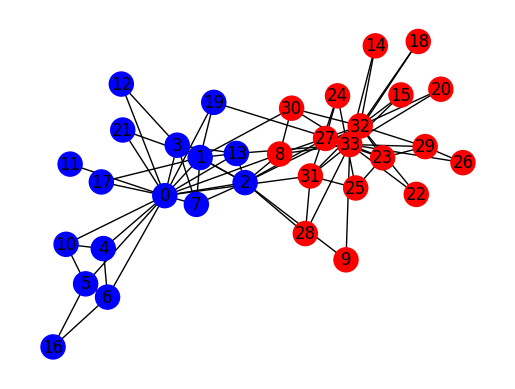

In [5]:
from matplotlib import pyplot as plt
from QHyper.problems.network_communities.utils import COLORS
import networkx as nx



color_map = []
for node in karate_club_problem.G:
    color_map.append(COLORS[karate_solution_gurobi["x" + str(node)]])

f = plt.figure()
nx.draw(
    karate_club_problem.G,
    node_color=color_map,
    with_labels=True,
    ax=f.add_subplot(111),
)